In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002645E7CE930>

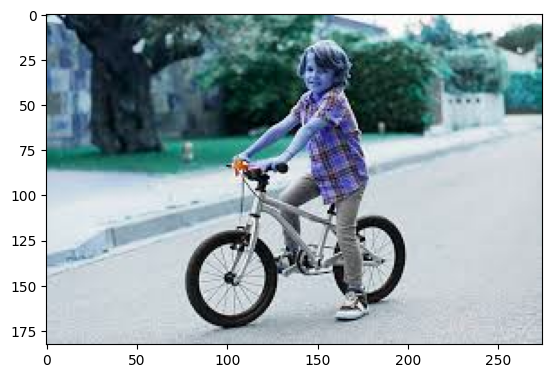

In [8]:
img=cv2.imread('boy.jpg')
plt.imshow(img)

In [9]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [10]:
print(ClassIndex)

[2 1]


In [11]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color=(0,255,0), thickness=3)

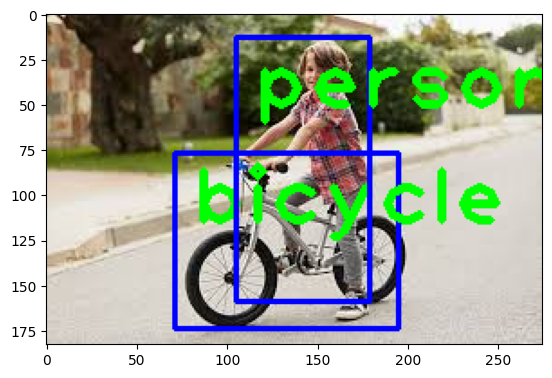

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
import cv2

# Load the pre-trained model and class labels (example code, adjust according to your model and labels)
# model = cv2.dnn_DetectionModel('model.pb')  # Placeholder for loading your model
# classLabels = ['label1', 'label2', ..., 'label80']  # Placeholder for your class labels

cap = cv2.VideoCapture('855574-hd_1920_1080_25fps.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection by Simplilearn', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [13]:
#VIdeo

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidece, bbox= model.detect(frame, confThreshold=0.55)

    print(ClassIndex)

    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
        if(ClassInd<=80):
             cv2.rectangle(img,boxes,(255,0,0),2)
             cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color=(0,255,0), thickness=3)
    

    cv2.imshow('objdetection by simplilearn',frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyalAllWindows()

IndentationError: expected an indented block after 'for' statement on line 20 (3612116354.py, line 21)

In [15]:
import cv2

# Load the pre-trained model and class labels (example code, adjust according to your model and labels)
# model = cv2.dnn_DetectionModel('model.pb')  # Placeholder for loading your model
# classLabels = ['label1', 'label2', ..., 'label80']  # Placeholder for your class labels

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection by Simplilearn', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [26]:

cap = cv2.VideoCapture('3206742-uhd_2160_3840_30fps.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects in the frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print("ClassIndex:", ClassIndex)
    print("Confidence:", confidence)
    print("Bounding Boxes:", bbox)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection by Simplilearn', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [29]:
import cv2

# Load your pre-trained model and class labels here
# Example:
# model = cv2.dnn_DetectionModel('model_path', 'config_path')
# model.setInputSize(320, 320)
# model.setInputScale(1.0 / 127.5)
# model.setInputMean((127.5, 127.5, 127.5))
# model.setInputSwapRB(True)

# classLabels = ["label1", "label2", ..., "label80"]

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects in the frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print("ClassIndex:", ClassIndex)
    print("Confidence:", confidence)
    print("Bounding Boxes:", bbox)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection by Simplilearn', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 